# This part of the assignment answers the following questions

Assuming you only know the biomass and number of individuals at the start of the first month (from Table 2). Assume a growth rate of 11,2%. How much will be harvested during the next 12 months, if we assume that all fish over 4kg will be harvested at the end of each month?

Do you see any other interesting questions we could try to answer with these or similar kinds of data?

# Imports

In [1]:
from typing import List
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Helper classes

In [2]:
class Salmon:
    """A class representing a single salmon."""
    
    def __init__(self, weight: float):
        """
        Initialize a salmon with a given weight.
        
        Parameters:
        weight (float): The weight of the salmon in kilograms.
        """
        self.weight = weight

In [3]:
class SalmonPopulation:
    """A class representing a population of salmon."""
    
    def __init__(self, population_count: int, mean: float, stddev: float, growth_rate: float):
        """
        Initialize a population of salmon with a given size, mean weight, standard deviation of weight, and growth rate.
        
        Parameters:
        population_count (int): The number of salmon in the population.
        mean (float): The mean weight of the salmon in the population.
        stddev (float): The standard deviation of the weight of the salmon in the population.
        growth_rate (float): The monthly growth rate of the salmon in the population, as a decimal.
        """
        self.salmon: List[Salmon] = []
        self.growth_rate = growth_rate
        self.harvested: List[Salmon] = []
        self.non_harvested: List[Salmon] = []
        
        # This is pretty inefficient. Fix later.
        for i in range(population_count):
            # can't set seed!! Fix.
            weight = random.normalvariate(mean, stddev)
            salmon = Salmon(weight)
            self.salmon.append(salmon)
            
    def harvest(self):
        """Separate the salmon in the population into those that are harvested and those that are not."""
        for salmon in self.salmon:
            if salmon.weight >= 4:
                self.harvested.append(salmon)
            else:
                self.non_harvested.append(salmon)
    
    # method in Salmon, call in SalmonPopulation. Fix
    def grow(self):
        """Grow the non-harvested salmon in the population by the monthly growth rate."""
        for salmon in self.non_harvested:
            salmon.weight *= (1 + self.growth_rate)
            
    def update(self):
        """Update the population by separating out the harvested salmon and resetting non_harvested list"""
        self.salmon = self.non_harvested
        self.non_harvested = []

In [4]:
class SalmonCalculator:
    """A class for calculating statistics about a population of salmon."""
    
    def __init__(self, population: SalmonPopulation):
        """
        Initialize a calculator with a given population of salmon.
        
        Parameters:
        population (SalmonPopulation): The population of salmon to calculate statistics for.
        """
        self.population = population
        
    def mean_weight(self, group: str) -> float:
        """
        Calculate the mean weight of the given group of salmon.

        Parameters:
        group (str): The group of salmon to calculate the mean weight for, either 'harvested', 'non_harvested', or 'all'.

        Returns:
        float: The mean weight of the given group of salmon, or 0 if there are no salmon in the group.
        """
        
        # Could be expressed in a more readable way. Fix later
        if group == 'harvested':
            group_population = self.population.harvested
        else:
            group_population = self.population.non_harvested

        weights = [s.weight for s in group_population]

        if not weights:
            return 0
        else:
            return statistics.mean(weights)

    def stddev_weight(self, group: str) -> float:
        """
        Calculate the standard deviation of the weight of the given group of salmon.

        Parameters:
        group (str): The group of salmon to calculate the standard deviation of weight for, either 'harvested', 'non_harvested', or 'all'.

        Returns:
        float: The standard deviation of the weight of the given group of salmon, or 0 if there are not enough salmon in the group to calculate the standard deviation.
        """
        # Could be expressed in a more readable way. Fix later
        if group == 'harvested':
            weights = [s.weight for s in self.population.harvested]
        else:
            weights = [s.weight for s in self.population.non_harvested]

        if len(weights) < 2:
            return 0
        else:
            return statistics.stdev(weights)


# Simulation class

In [27]:
class Simulation:
    """A class for running a simulation of a population of salmon."""
    
    def __init__(self, population: SalmonPopulation, calculator: SalmonCalculator):
        """
        Initialize a simulation with a given population of salmon and a calculator for that population.
        
        Parameters:
        population (SalmonPopulation): The population of salmon to simulate.
        calculator (SalmonCalculator): The calculator for the given population of salmon.
        """
        self.population = population
        self.calculator = calculator
            
    def run(self, months: int):
        """
        Run the simulation for a given number of months, updating the population, plotting the weight distributions, and printing the statistics each month.

        Parameters:
        months (int): The number of months to run the simulation for.
        """
        for i in range(months):
            self.population.harvest()
            self.plot_weight_distributions(i + 1)
            self.print_statistics()
            self.population.grow()
            self.population.update()

    def plot_weight_distributions(self, month):
        """Plot the weight distributions of the harvested and non-harvested salmon in the population."""

        # Get the weight data for the current month
        data = {
            'non_harvested_salmon': [s.weight for s in self.population.non_harvested],
            'harvested_salmon': [s.weight for s in self.population.harvested]
        }
        
        # Get the weights for the non-harvested and harvested salmon
        non_harvested_weights = np.ones_like(data['non_harvested_salmon']) / len(data['non_harvested_salmon'])
        harvested_weights = np.ones_like(data['harvested_salmon']) / len(data['harvested_salmon'])
        

        # Create a figure and a histogram plot
        # Figure out a way to ensure bins are dynamic
        plt.figure(figsize=(10, 6))
        plt.hist(data['non_harvested_salmon'], bins=50, weights=non_harvested_weights, label='Non-harvested')
        plt.hist(data['harvested_salmon'], bins=10, weights=harvested_weights, label='Harvested')
        
        # xlim and ylim
        plt.xlim([0, 6])
        plt.ylim([0, 0.1])

        # Add labels, title to the plot
        plt.xlabel('Weight (kg)', fontsize=14)
        plt.ylabel('Proportion of salmon', fontsize=14)
        plt.title(f'Weight distribution of harvested and non-harvested salmon (month {month})', fontsize=16)

        # Add a legend to the plot and show
        plt.legend(fontsize=12)
        plt.show()
    
    def print_statistics(self):
        """Print the statistics for the harvested and non-harvested salmon in the population."""
        print(f'Amount of non-harvested salmon: {len(self.population.non_harvested)}')
        print(f'Mean weight of non-harvested salmon: {round(self.calculator.mean_weight("non_harvested"), 2)}')
        print(f'Standard deviation of weight of non-harvested salmon: {round(self.calculator.stddev_weight("non_harvested"), 2)}')
        print(f'Amount of harvested salmon: {len(self.population.harvested)}')
        print(f'Mean weight of harvested salmon: {round(self.calculator.mean_weight("harvested"), 2)}')
        print(f'Standard deviation of weight of harvested salmon: {round(self.calculator.stddev_weight("harvested"), 2)}')
        print('')

# Run

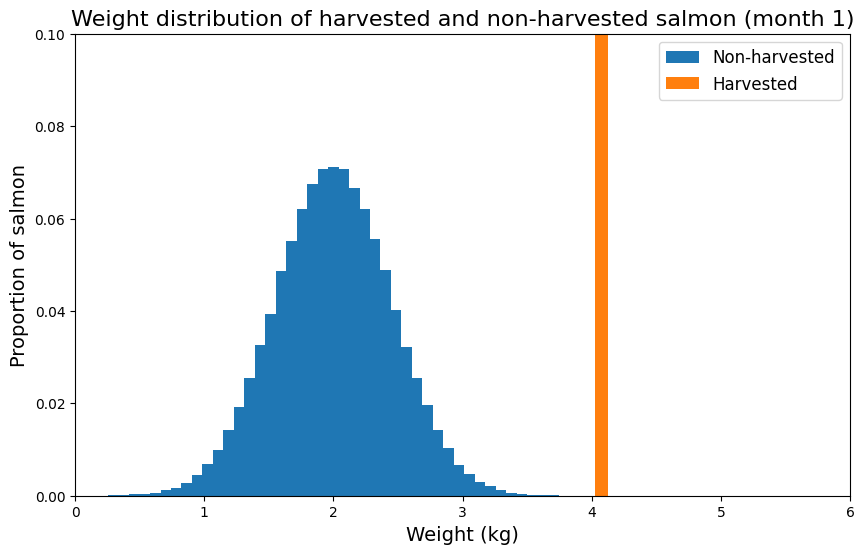

Amount of non-harvested salmon: 156076
Mean weight of non-harvested salmon: 2.0
Standard deviation of weight of non-harvested salmon: 0.45
Amount of harvested salmon: 1
Mean weight of harvested salmon: 4.02
Standard deviation of weight of harvested salmon: 0



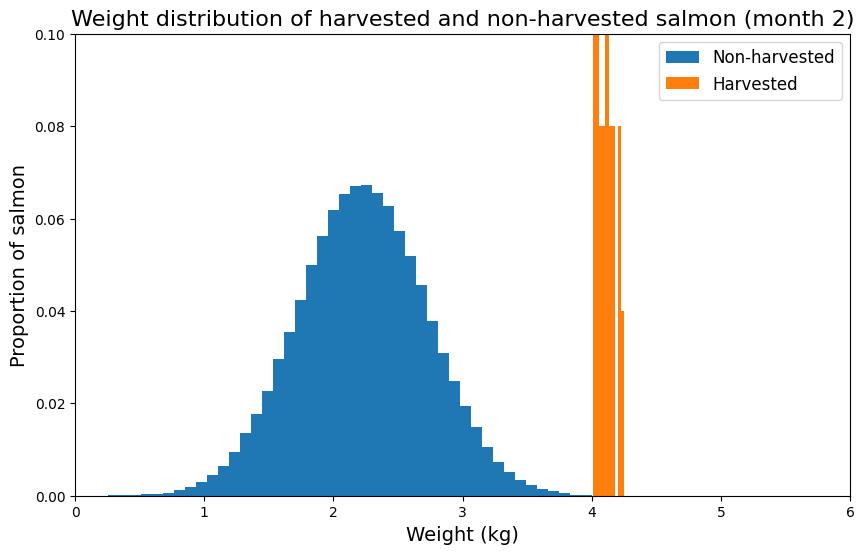

Amount of non-harvested salmon: 156052
Mean weight of non-harvested salmon: 2.23
Standard deviation of weight of non-harvested salmon: 0.5
Amount of harvested salmon: 25
Mean weight of harvested salmon: 4.09
Standard deviation of weight of harvested salmon: 0.07



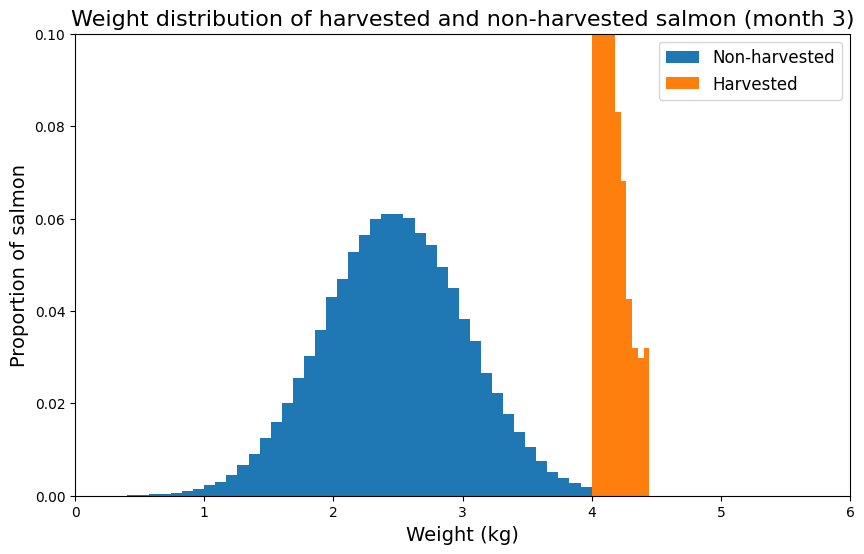

Amount of non-harvested salmon: 155607
Mean weight of non-harvested salmon: 2.47
Standard deviation of weight of non-harvested salmon: 0.55
Amount of harvested salmon: 470
Mean weight of harvested salmon: 4.14
Standard deviation of weight of harvested salmon: 0.11



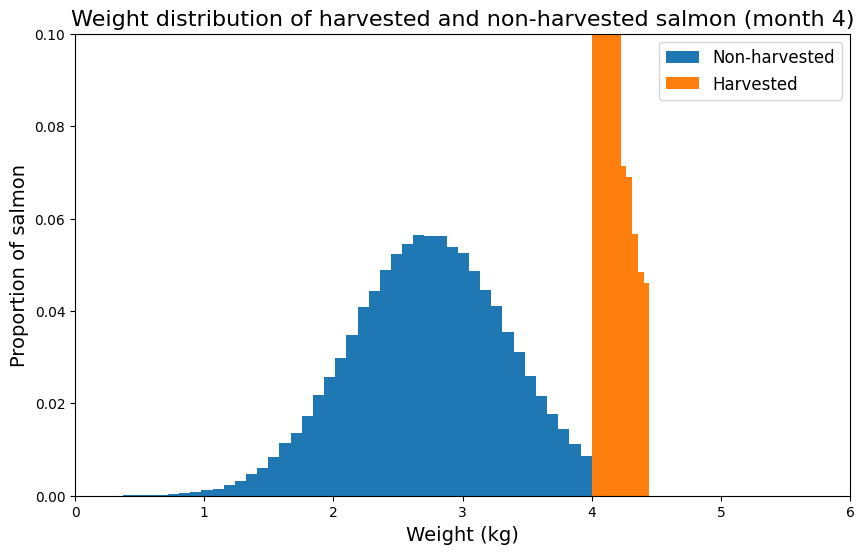

Amount of non-harvested salmon: 152717
Mean weight of non-harvested salmon: 2.72
Standard deviation of weight of non-harvested salmon: 0.58
Amount of harvested salmon: 3360
Mean weight of harvested salmon: 4.16
Standard deviation of weight of harvested salmon: 0.12



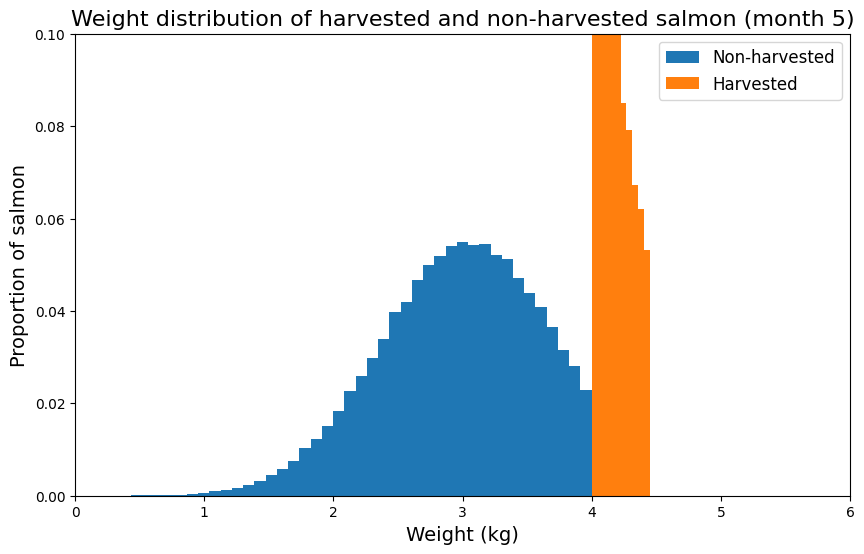

Amount of non-harvested salmon: 142624
Mean weight of non-harvested salmon: 2.94
Standard deviation of weight of non-harvested salmon: 0.59
Amount of harvested salmon: 13453
Mean weight of harvested salmon: 4.18
Standard deviation of weight of harvested salmon: 0.12



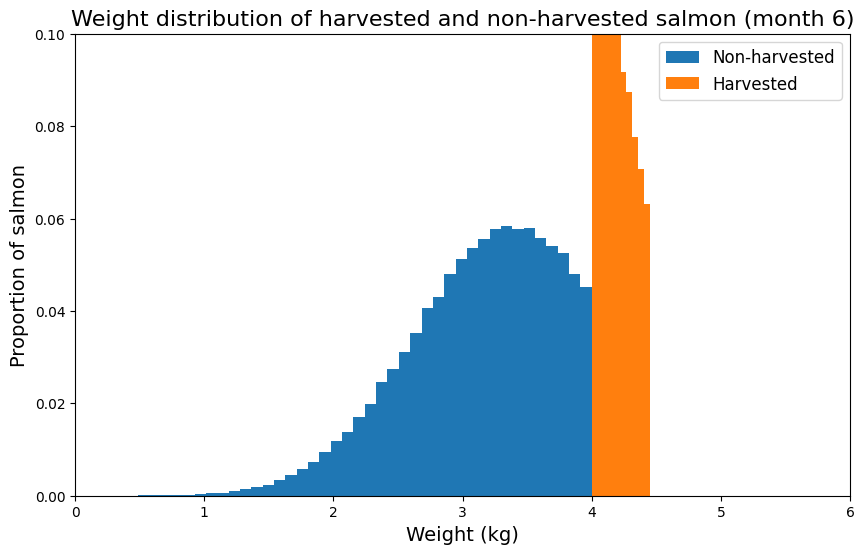

Amount of non-harvested salmon: 122022
Mean weight of non-harvested salmon: 3.11
Standard deviation of weight of non-harvested salmon: 0.57
Amount of harvested salmon: 34055
Mean weight of harvested salmon: 4.19
Standard deviation of weight of harvested salmon: 0.13



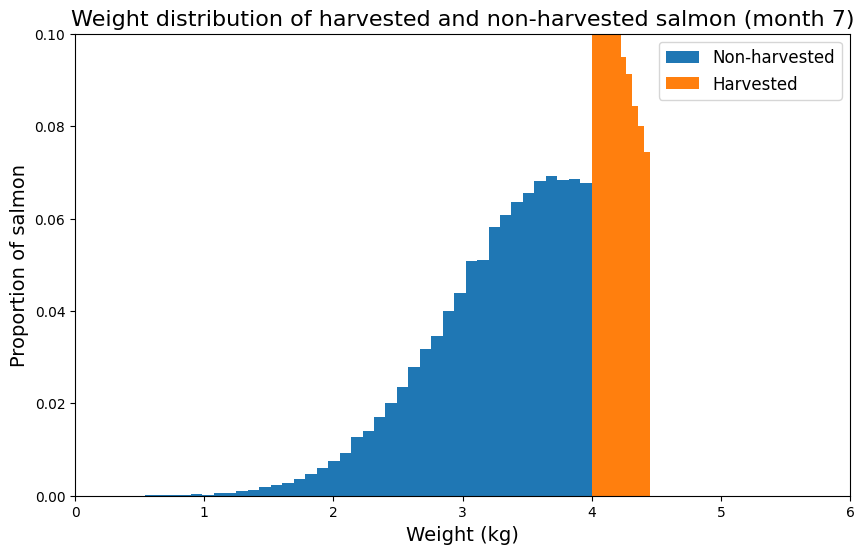

Amount of non-harvested salmon: 93691
Mean weight of non-harvested salmon: 3.24
Standard deviation of weight of non-harvested salmon: 0.55
Amount of harvested salmon: 62386
Mean weight of harvested salmon: 4.2
Standard deviation of weight of harvested salmon: 0.13



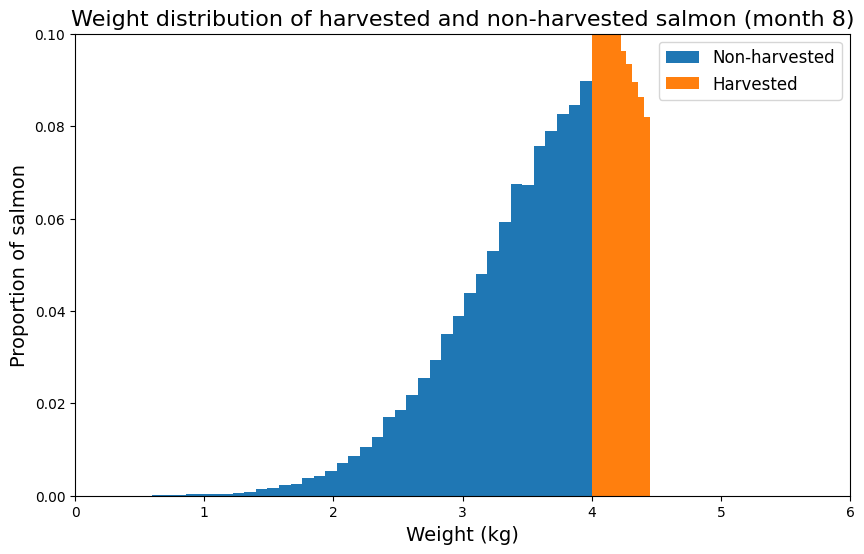

Amount of non-harvested salmon: 64597
Mean weight of non-harvested salmon: 3.32
Standard deviation of weight of non-harvested salmon: 0.53
Amount of harvested salmon: 91480
Mean weight of harvested salmon: 4.21
Standard deviation of weight of harvested salmon: 0.13



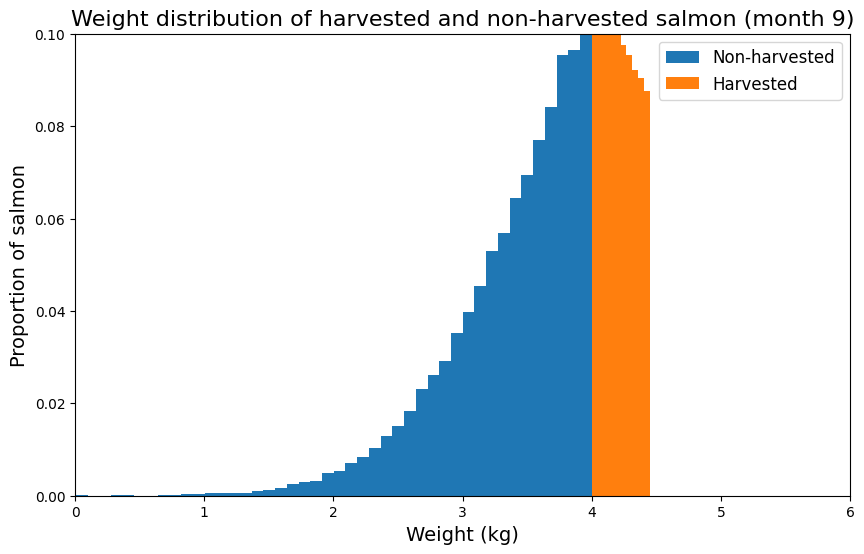

Amount of non-harvested salmon: 40484
Mean weight of non-harvested salmon: 3.37
Standard deviation of weight of non-harvested salmon: 0.52
Amount of harvested salmon: 115593
Mean weight of harvested salmon: 4.21
Standard deviation of weight of harvested salmon: 0.13



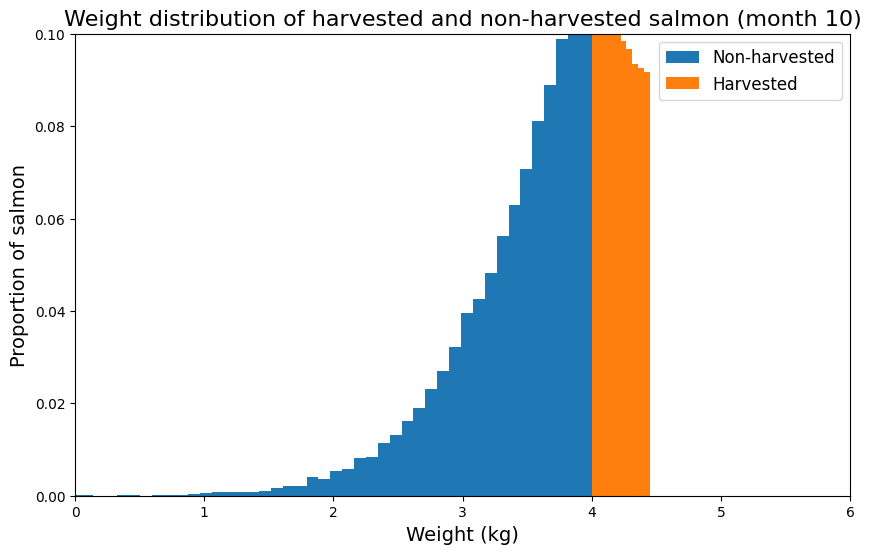

Amount of non-harvested salmon: 23657
Mean weight of non-harvested salmon: 3.39
Standard deviation of weight of non-harvested salmon: 0.52
Amount of harvested salmon: 132420
Mean weight of harvested salmon: 4.22
Standard deviation of weight of harvested salmon: 0.13



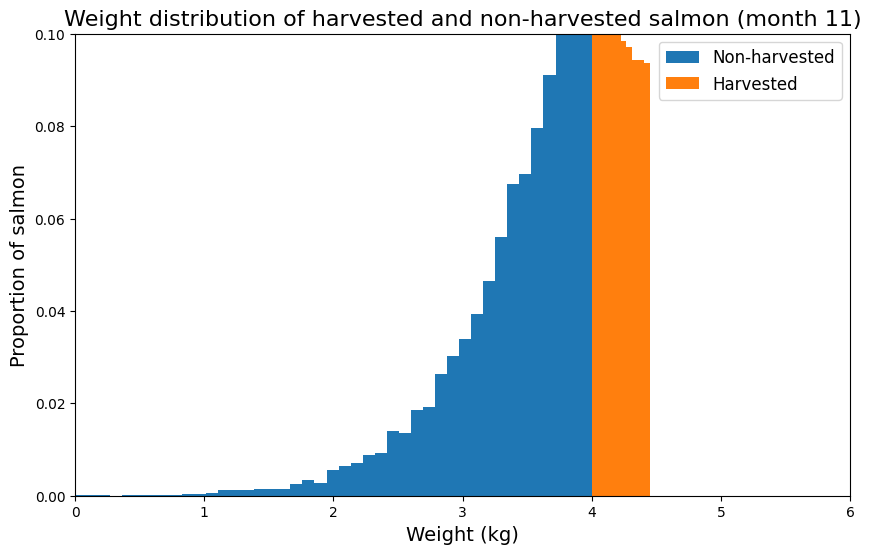

Amount of non-harvested salmon: 13197
Mean weight of non-harvested salmon: 3.4
Standard deviation of weight of non-harvested salmon: 0.53
Amount of harvested salmon: 142880
Mean weight of harvested salmon: 4.22
Standard deviation of weight of harvested salmon: 0.13



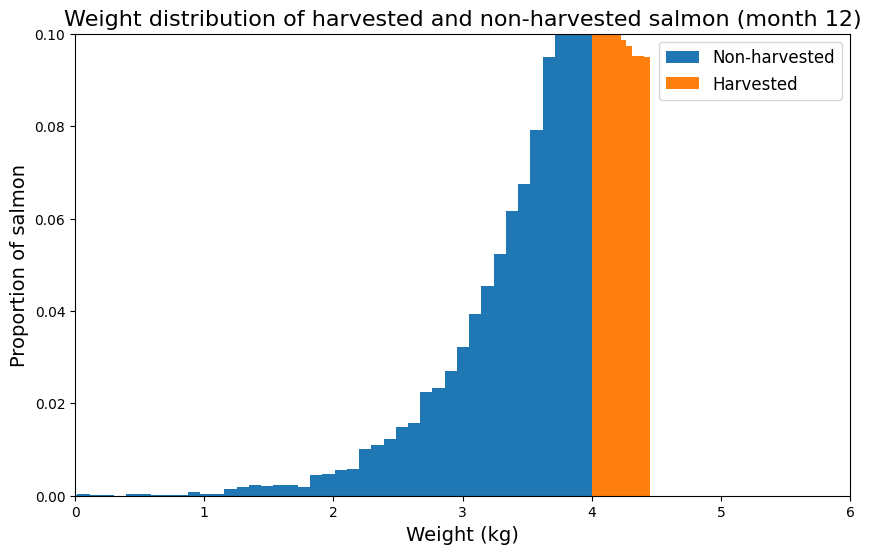

Amount of non-harvested salmon: 7145
Mean weight of non-harvested salmon: 3.4
Standard deviation of weight of non-harvested salmon: 0.55
Amount of harvested salmon: 148932
Mean weight of harvested salmon: 4.22
Standard deviation of weight of harvested salmon: 0.13



In [28]:
population = SalmonPopulation(156077, 2, 0.45, 0.112)
calculator = SalmonCalculator(population)
simulation = Simulation(population, calculator)
simulation.run(12)